# <center>LOAN Eligibility criteria</center>

## Introducation
Loan eligibility prediction helps banks decide if a person or business can get a loan. It looks at things like income, credit score, and past loans to check if they can repay the money. Banks use computer programs and past data to make this decision quickly and accurately.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train=pd.read_csv(r'C:\Users\Rutesh\Downloads\train_ctrUa4K - train_ctrUa4K.csv')

### Explore Data set

In [6]:
df_train.head() #show first 5 row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### As we can see in the output.

There are 614 entries
There are total 13 features (0 to 12)
There are three types of datatype dtypes: float64(4), int64(1), object(8)
It's Memory usage that is, memory usage: 62.5+ KB
Also, We can check how many missing values available in the Non-Null Count column


In [9]:
df_train.describe() #show numeric columns stastical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df_train.shape

(614, 13)

### Data cleaning

In [12]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling Missing value

In [14]:
# Fill missing values for numerical features with their mean
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(), inplace=True)

# Fill missing values for categorical features with their mode
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [15]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df_train['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df_train=df_train.replace(to_replace='3+',value=4)

In [18]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
df_train['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

### Data Visulization

#### Univariate Analysis of Numerical Features


##### Questions: What is the distribution of ApplicantIncome, LoanAmount, and Credit_History?

Histograms to visualize the distribution.
Box plots to detect outliers.

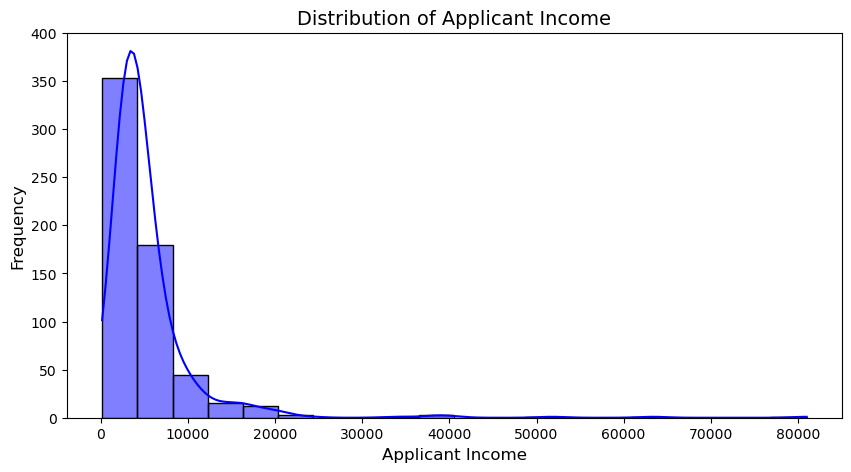

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['ApplicantIncome'], bins=20, kde=True, color='blue')
plt.title('Distribution of Applicant Income', fontsize=14)
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

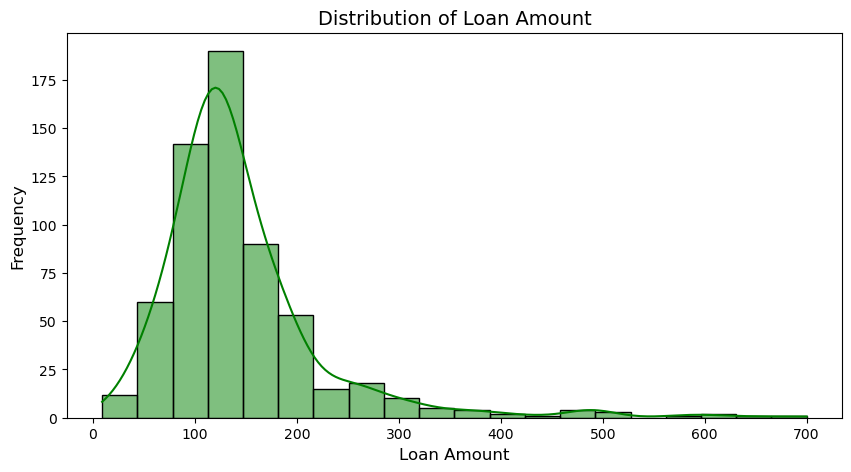

In [25]:
# Distribution of Loan Amount
plt.figure(figsize=(10, 5))
sns.histplot(df_train['LoanAmount'], bins=20, kde=True, color='green')
plt.title('Distribution of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

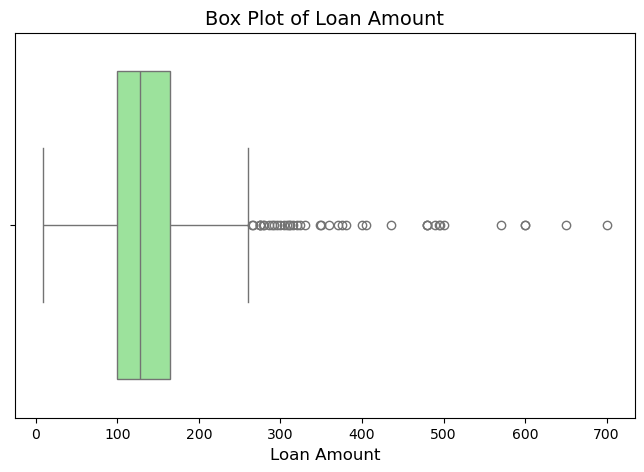

In [26]:
# Box plot for Loan Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['LoanAmount'], color='lightgreen')
plt.title('Box Plot of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.show()

In [27]:
Q1 = df_train['LoanAmount'].quantile(0.25)
Q3 = df_train['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['LoanAmount'] >= lower_bound) & (df_train['LoanAmount'] <= upper_bound)]

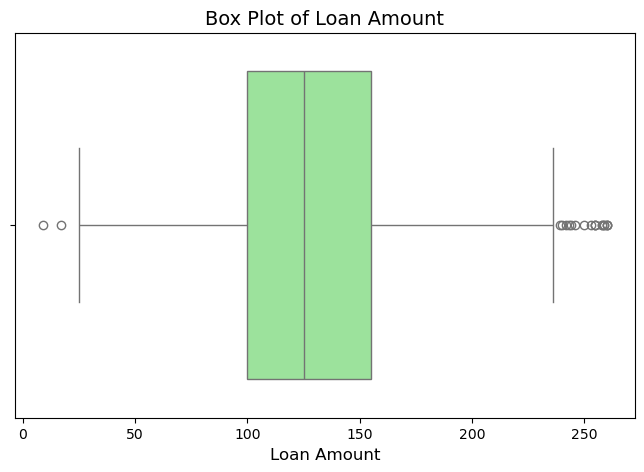

In [28]:
# Box plot for Loan Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['LoanAmount'], color='lightgreen')
plt.title('Box Plot of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

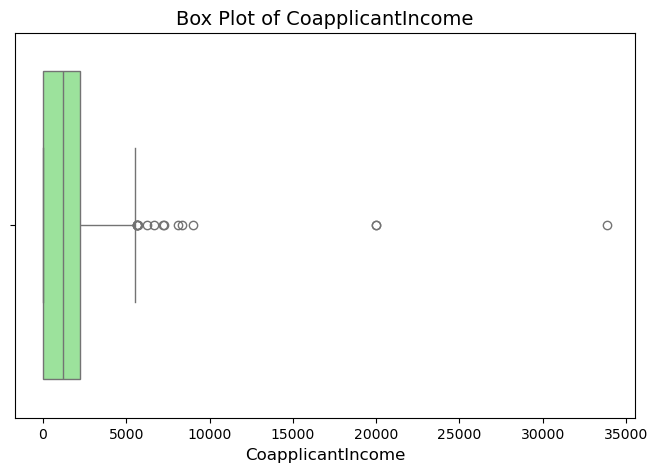

In [29]:
# Box plot for co-applicant Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['CoapplicantIncome'], color='lightgreen')
plt.title('Box Plot of CoapplicantIncome', fontsize=14)
plt.xlabel('CoapplicantIncome', fontsize=12)
plt.show

In [30]:
Q1 = df_train['CoapplicantIncome'].quantile(0.25)
Q3 = df_train['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['CoapplicantIncome'] >= lower_bound) & (df_train['CoapplicantIncome'] <= upper_bound)]

<function matplotlib.pyplot.show(close=None, block=None)>

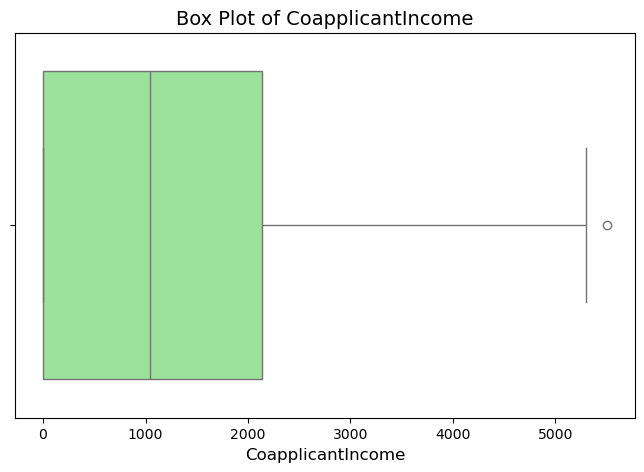

In [31]:
# Box plot for co-applicant Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['CoapplicantIncome'], color='lightgreen')
plt.title('Box Plot of CoapplicantIncome', fontsize=14)
plt.xlabel('CoapplicantIncome', fontsize=12)
plt.show

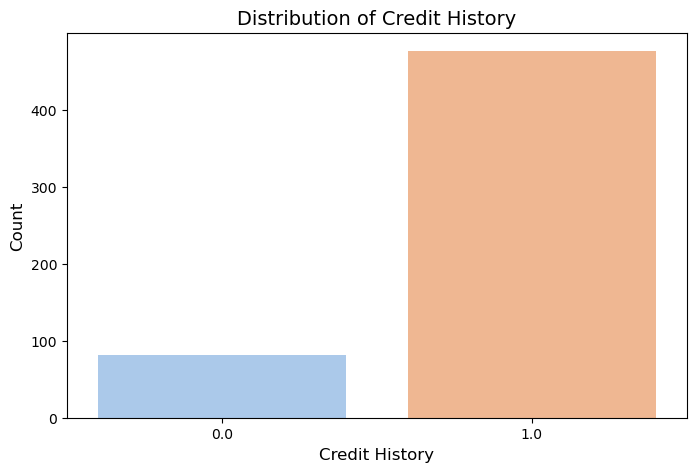

In [32]:
# Distribution of Credit History
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['Credit_History'], palette='pastel')
plt.title('Distribution of Credit History', fontsize=14)
plt.xlabel('Credit History', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Univariate Analysis of Categorical Features


###### Q:How do Gender, Married, Education, Self_Employed, and Property_Area distribute? Visualizations:

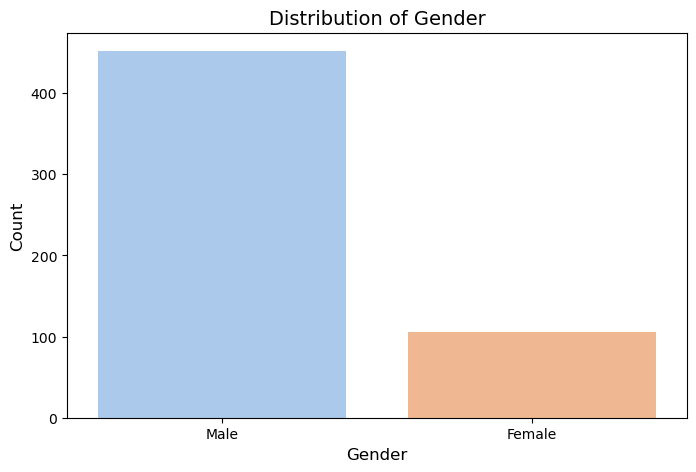

In [35]:
# Bar plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_train, palette='pastel')
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

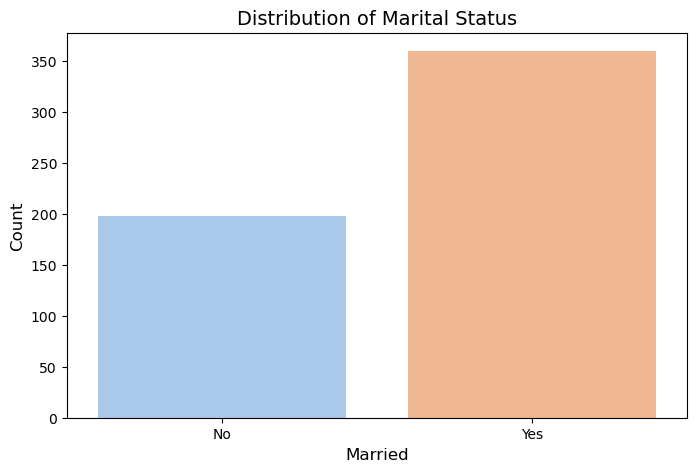

In [36]:
# Bar plot for Married
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', data=df_train, palette='pastel')
plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel('Married', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

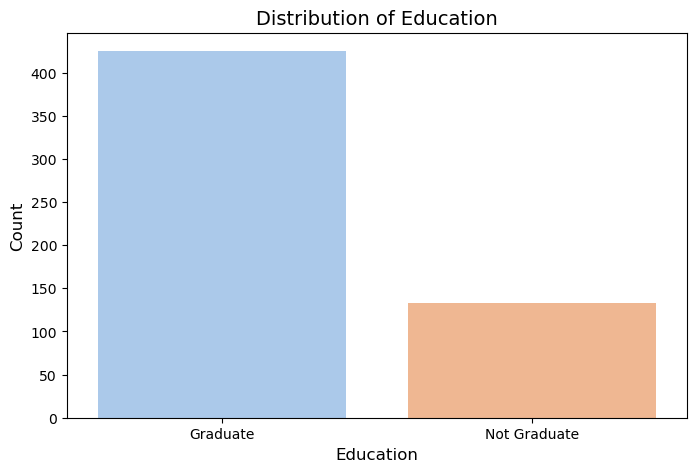

In [37]:
# Bar plot for Education
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=df_train, palette='pastel')
plt.title('Distribution of Education', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

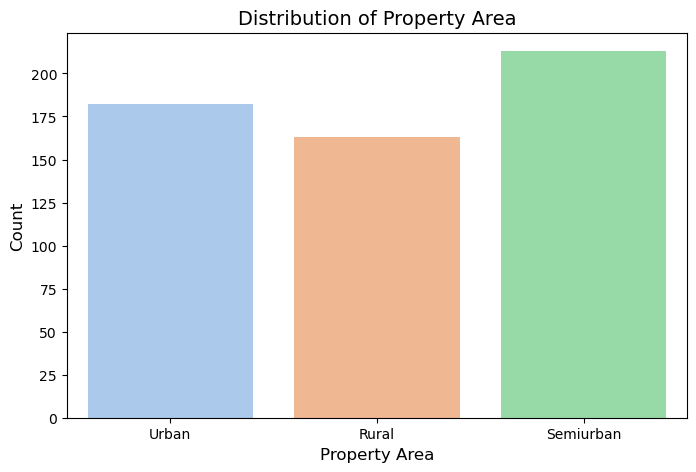

In [38]:
# Bar plot for Property_Area
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', data=df_train, palette='pastel')
plt.title('Distribution of Property Area', fontsize=14)
plt.xlabel('Property Area', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Numerical Features

Identify the range, central tendency, and any skewness in the data 
Use box plots to detect any significant outliers.

                                                                    
Categorical Features

Understand the distribution of categories 

#### Bivariate Analysis


##### Loan_Status vary with ApplicantIncome

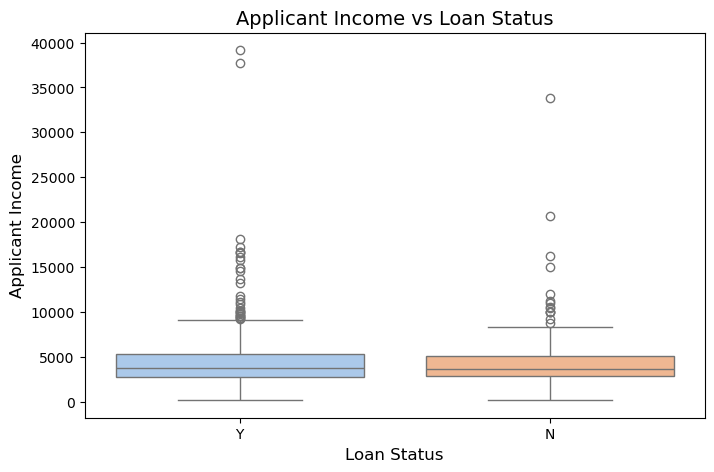

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_train, palette='pastel')
plt.title('Applicant Income vs Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Applicant Income', fontsize=12)
plt.show()

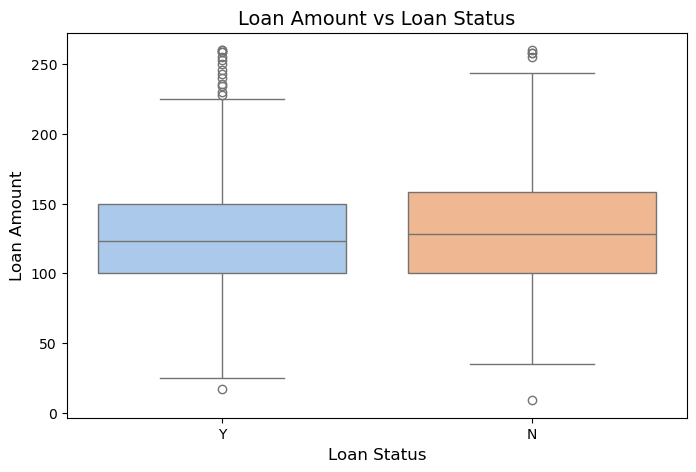

In [43]:
#Box Plot: Loan_Status vs LoanAmount

plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df_train, palette='pastel')
plt.title('Loan Amount vs Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.show()


In [44]:
Q1 = df_train['ApplicantIncome'].quantile(0.25)
Q3 = df_train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['ApplicantIncome'] >= lower_bound) & (df_train['ApplicantIncome'] <= upper_bound)]

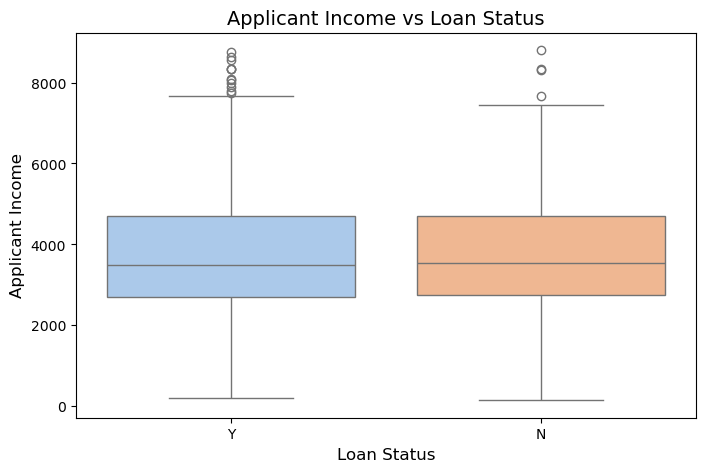

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_train, palette='pastel')
plt.title('Applicant Income vs Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Applicant Income', fontsize=12)
plt.show()

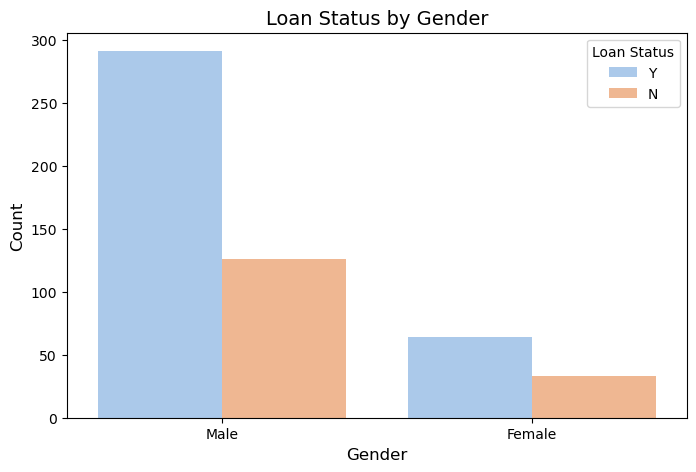

In [46]:
#Gender vs Loan_Status

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Loan_Status', data=df_train, palette='pastel')
plt.title('Loan Status by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

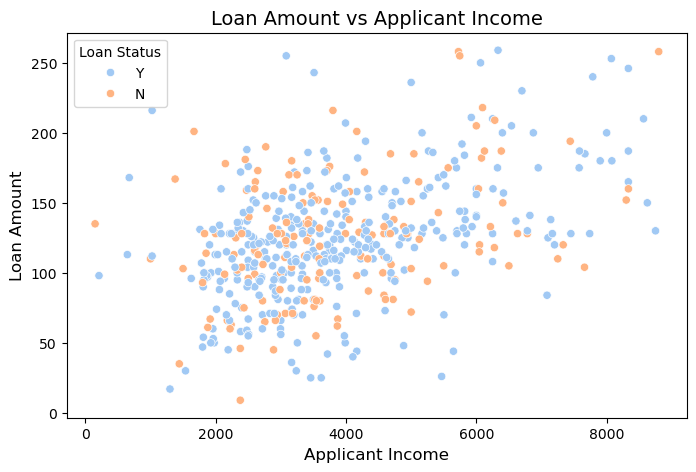

In [47]:
#Scatter Plot: ApplicantIncome vs LoanAmount

plt.figure(figsize=(8, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df_train, palette='pastel')
plt.title('Loan Amount vs Applicant Income', fontsize=14)
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

Higher ApplicantIncome or CoapplicantIncome did not always guarantee loan approval, suggesting other factors are more influential.
Applicants with smaller loan amounts (LoanAmount) were more likely to have their loans approved.


#### Multivariate Analysis


###### Visualizations:

Pair Plots to explore relationships between multiple continuous variables.
Heatmaps to visualize correlations between numeric variables

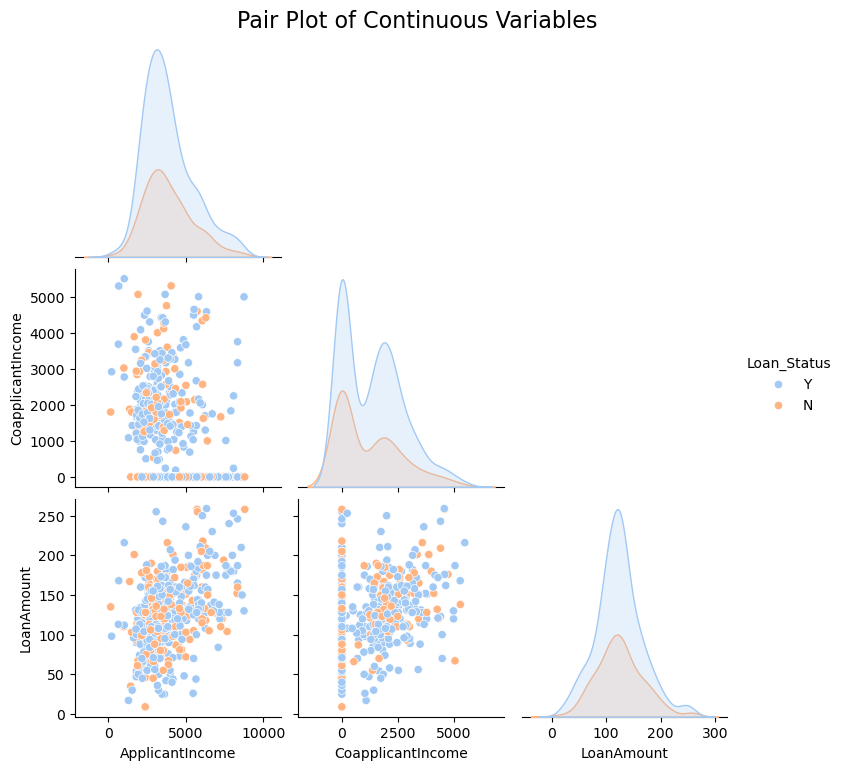

In [51]:
sns.pairplot(df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], 
             hue='Loan_Status', palette='pastel', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Continuous Variables', y=1.02, fontsize=16)
plt.show()

#### Heatmap

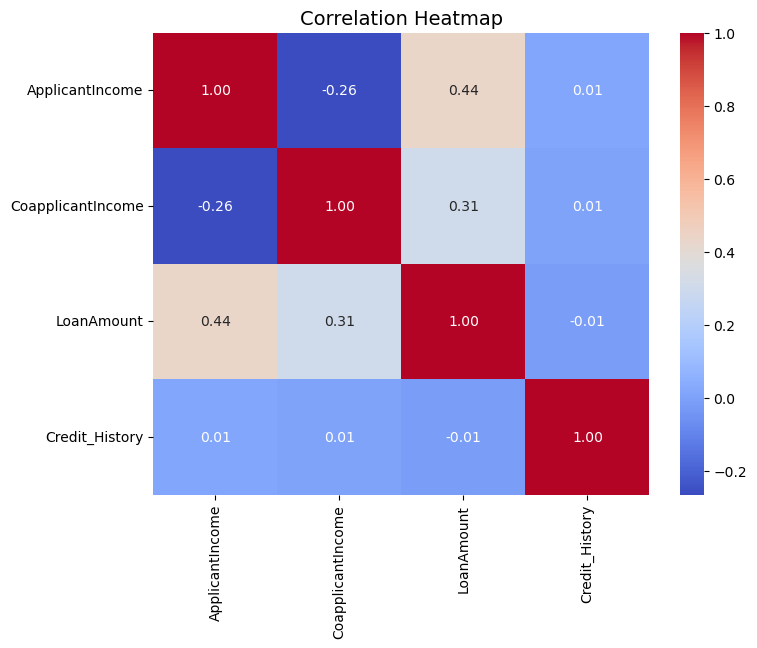

In [53]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

### Drop

In [55]:
df_train.drop('Loan_ID',axis=1,inplace=True) #NOT ANY USE HENCE DROP


In [56]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Encoding

In [58]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df=['Gender','Married','Education','Property_Area','Self_Employed','Loan_Status']
df_train[df]=oe.fit_transform(df_train[df])


In [59]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,4,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


### Feature(x) and Target(y)

In [61]:
x = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [62]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,1.0,1.0,4,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0


In [63]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 514, dtype: float64

In [64]:
y.value_counts()

Loan_Status
1.0    355
0.0    159
Name: count, dtype: int64

### Balancing data

In [66]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)

y.value_counts()

Loan_Status
1.0    355
0.0    355
Name: count, dtype: int64

### Train_test Split

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=11)

### Scaling data

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [71]:
X_train

array([[ 0.53052157, -1.1202792 , -0.71770201, ...,  0.23146029,
         0.57749765, -1.35463026],
       [-2.07287343, -1.37723384,  0.17738008, ...,  0.23146029,
         0.57749765, -0.03635662],
       [ 0.53052157,  0.78922087, -0.71770201, ..., -2.87644674,
        -1.98347314, -1.35463026],
       ...,
       [ 0.53052157,  0.78922087, -0.71770201, ...,  0.23146029,
         0.57749765, -0.03635662],
       [ 0.53052157,  0.78922087, -0.71770201, ...,  0.23146029,
         0.57749765, -0.03635662],
       [ 0.53052157,  0.78922087, -0.10555189, ...,  0.23146029,
        -0.23201525, -0.52122792]])

### Model Building

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

### Model Evaluation 

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")

Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213



### Solver Tuning 

#### liblinear

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213

Training Score : 0.7706237424547284
Testing Score : 0.7699530516431925


#### saga

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213

Training Score : 0.7706237424547284
Testing Score : 0.7699530516431925


#### newton-cholesky

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cholesky')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213

Training Score : 0.7706237424547284
Testing Score : 0.7699530516431925


#### newton-cg

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213

Training Score : 0.7706237424547284
Testing Score : 0.7699530516431925


#### lbfgs #default solver

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')

Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213

Training Score : 0.7706237424547284
Testing Score : 0.7699530516431925


In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print(f'Training Score : {train}\nTesting Score : {test}')
print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n{cr}")

Training Score : 0.7706237424547284
Testing Score : 0.7699530516431925
Accuracy : 0.7699530516431925
ROC : 0.7754192409532217
[[67 43]
 [ 6 97]]
              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73       110
         1.0       0.69      0.94      0.80       103

    accuracy                           0.77       213
   macro avg       0.81      0.78      0.77       213
weighted avg       0.81      0.77      0.76       213



### Naive bayes

In [89]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

In [90]:

br=BernoulliNB()

In [91]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    train=model.score(X_train,y_train)
    test=model.score(X_test,y_test)
    print(f"Trainig ac:{train}\n\n Testing ac:{test}\n\n")
    print(classification_report(y_pred,y_test))
    return model

In [92]:
mymodel(br)

Trainig ac:0.7706237424547284

 Testing ac:0.7136150234741784


              precision    recall  f1-score   support

         0.0       0.63      0.78      0.69        89
         1.0       0.81      0.67      0.73       124

    accuracy                           0.71       213
   macro avg       0.72      0.72      0.71       213
weighted avg       0.73      0.71      0.72       213



BernoulliNB()

### Support vector machine

In [94]:
from sklearn.svm import SVC

In [95]:
svc=SVC()

In [96]:
mymodel(svc)

Trainig ac:0.8128772635814889

 Testing ac:0.7605633802816901


              precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        73
         1.0       0.93      0.69      0.79       140

    accuracy                           0.76       213
   macro avg       0.77      0.79      0.76       213
weighted avg       0.82      0.76      0.77       213



SVC()

##### Kernal={'linear', 'poly', 'rbf', 'sigmoid'} 

In [98]:
svm=SVC(kernel='linear')

In [99]:
mymodel(svm)

Trainig ac:0.7665995975855131

 Testing ac:0.7699530516431925


              precision    recall  f1-score   support

         0.0       0.58      0.96      0.72        67
         1.0       0.97      0.68      0.80       146

    accuracy                           0.77       213
   macro avg       0.78      0.82      0.76       213
weighted avg       0.85      0.77      0.78       213



SVC(kernel='linear')

#### Hyper parameter tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
para_grid={'C':[1,10],'gamma':[1,10]}

In [103]:
gs=GridSearchCV(svm,para_grid,verbose=3)

In [104]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.800 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.730 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.808 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.778 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.717 total time=   0.0s
[CV 1/5] END .....................C=1, gamma=10;, score=0.800 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.730 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.808 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.778 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.717 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.800 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10], 'gamma': [1, 10]}, verbose=3)

In [105]:
gs.best_params_

{'C': 1, 'gamma': 1}

In [106]:
SVM=SVC(C=1,gamma=1,kernel='linear')

In [107]:
mymodel(SVM)

Trainig ac:0.7665995975855131

 Testing ac:0.7699530516431925


              precision    recall  f1-score   support

         0.0       0.58      0.96      0.72        67
         1.0       0.97      0.68      0.80       146

    accuracy                           0.77       213
   macro avg       0.78      0.82      0.76       213
weighted avg       0.85      0.77      0.78       213



SVC(C=1, gamma=1, kernel='linear')

In [108]:
svm=SVC(kernel='poly')

In [109]:
mymodel(svm)

Trainig ac:0.8189134808853119

 Testing ac:0.7323943661971831


              precision    recall  f1-score   support

         0.0       0.58      0.85      0.69        75
         1.0       0.89      0.67      0.76       138

    accuracy                           0.73       213
   macro avg       0.74      0.76      0.73       213
weighted avg       0.78      0.73      0.74       213



SVC(kernel='poly')

In [110]:
svm=SVC(kernel='rbf')

In [111]:
mymodel(svm)

Trainig ac:0.8128772635814889

 Testing ac:0.7605633802816901


              precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        73
         1.0       0.93      0.69      0.79       140

    accuracy                           0.76       213
   macro avg       0.77      0.79      0.76       213
weighted avg       0.82      0.76      0.77       213



SVC()

In [112]:
svm=SVC(kernel='sigmoid')

In [113]:
mymodel(svm)

Trainig ac:0.7344064386317908

 Testing ac:0.7370892018779343


              precision    recall  f1-score   support

         0.0       0.57      0.88      0.69        72
         1.0       0.91      0.67      0.77       141

    accuracy                           0.74       213
   macro avg       0.74      0.77      0.73       213
weighted avg       0.80      0.74      0.74       213



SVC(kernel='sigmoid')

### KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [116]:
mymodel(knn)

Trainig ac:0.9134808853118712

 Testing ac:0.8075117370892019


              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       103
         1.0       0.83      0.78      0.81       110

    accuracy                           0.81       213
   macro avg       0.81      0.81      0.81       213
weighted avg       0.81      0.81      0.81       213



KNeighborsClassifier(n_neighbors=3)

In [117]:
ac_list=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    ac=accuracy_score(y_test,y_pred)

    ac_list.append(ac)

In [118]:
ac_list

[0.8169014084507042,
 0.7981220657276995,
 0.8075117370892019,
 0.7511737089201878,
 0.7652582159624414,
 0.7793427230046949,
 0.7370892018779343,
 0.7417840375586855,
 0.7370892018779343,
 0.7183098591549296,
 0.7230046948356808,
 0.7276995305164319,
 0.7323943661971831,
 0.7323943661971831,
 0.7183098591549296,
 0.6948356807511737,
 0.7089201877934272,
 0.6995305164319249,
 0.7089201877934272,
 0.7089201877934272,
 0.7136150234741784,
 0.6995305164319249,
 0.704225352112676,
 0.6948356807511737,
 0.6948356807511737,
 0.676056338028169,
 0.6854460093896714,
 0.676056338028169,
 0.6901408450704225,
 0.6854460093896714,
 0.704225352112676,
 0.6948356807511737,
 0.7136150234741784,
 0.6807511737089202,
 0.6995305164319249,
 0.6901408450704225,
 0.6995305164319249,
 0.704225352112676,
 0.7089201877934272,
 0.6901408450704225,
 0.7089201877934272,
 0.704225352112676,
 0.7089201877934272,
 0.7183098591549296,
 0.7136150234741784,
 0.704225352112676,
 0.7183098591549296,
 0.7230046948356808,

In [119]:
max(ac_list)

0.8169014084507042

In [120]:
knn=KNeighborsClassifier(n_neighbors=1)


In [121]:
mymodel(knn)

Trainig ac:1.0

 Testing ac:0.8169014084507042


              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       115
         1.0       0.79      0.83      0.81        98

    accuracy                           0.82       213
   macro avg       0.82      0.82      0.82       213
weighted avg       0.82      0.82      0.82       213



KNeighborsClassifier(n_neighbors=1)

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dt=DecisionTreeClassifier()

In [124]:
mymodel(dt)

Trainig ac:1.0

 Testing ac:0.5915492957746479


              precision    recall  f1-score   support

         0.0       0.91      0.56      0.70       177
         1.0       0.25      0.72      0.37        36

    accuracy                           0.59       213
   macro avg       0.58      0.64      0.54       213
weighted avg       0.80      0.59      0.64       213



DecisionTreeClassifier()

### Hypertunning in parameter in dt

In [126]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Max depth={i} accuracy={ac}')

Max depth=1 accuracy=0.8028169014084507
Max depth=2 accuracy=0.8028169014084507
Max depth=3 accuracy=0.5915492957746479
Max depth=4 accuracy=0.596244131455399
Max depth=5 accuracy=0.5868544600938967
Max depth=6 accuracy=0.5868544600938967
Max depth=7 accuracy=0.5868544600938967
Max depth=8 accuracy=0.5821596244131455
Max depth=9 accuracy=0.5868544600938967
Max depth=10 accuracy=0.5821596244131455
Max depth=11 accuracy=0.596244131455399
Max depth=12 accuracy=0.5915492957746479
Max depth=13 accuracy=0.5915492957746479
Max depth=14 accuracy=0.5915492957746479
Max depth=15 accuracy=0.5915492957746479
Max depth=16 accuracy=0.5915492957746479
Max depth=17 accuracy=0.5821596244131455
Max depth=18 accuracy=0.5915492957746479
Max depth=19 accuracy=0.5821596244131455
Max depth=20 accuracy=0.5774647887323944
Max depth=21 accuracy=0.5821596244131455
Max depth=22 accuracy=0.5868544600938967
Max depth=23 accuracy=0.5915492957746479
Max depth=24 accuracy=0.5774647887323944
Max depth=25 accuracy=0.582

In [127]:
dt1=DecisionTreeClassifier(max_depth=3)

In [128]:
mymodel(dt1)

Trainig ac:0.8289738430583501

 Testing ac:0.5915492957746479


              precision    recall  f1-score   support

         0.0       0.85      0.57      0.68       163
         1.0       0.32      0.66      0.43        50

    accuracy                           0.59       213
   macro avg       0.58      0.62      0.56       213
weighted avg       0.72      0.59      0.62       213



DecisionTreeClassifier(max_depth=3)

### Min sample split

In [130]:
for i in range(2,111):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=2 accuracy=0.5821596244131455
Min sample split=3 accuracy=0.5915492957746479
Min sample split=4 accuracy=0.5868544600938967
Min sample split=5 accuracy=0.5821596244131455
Min sample split=6 accuracy=0.5821596244131455
Min sample split=7 accuracy=0.5915492957746479
Min sample split=8 accuracy=0.5915492957746479
Min sample split=9 accuracy=0.5915492957746479
Min sample split=10 accuracy=0.5868544600938967
Min sample split=11 accuracy=0.5868544600938967
Min sample split=12 accuracy=0.5868544600938967
Min sample split=13 accuracy=0.5868544600938967
Min sample split=14 accuracy=0.5774647887323944
Min sample split=15 accuracy=0.5821596244131455
Min sample split=16 accuracy=0.5821596244131455
Min sample split=17 accuracy=0.5821596244131455
Min sample split=18 accuracy=0.5774647887323944
Min sample split=19 accuracy=0.5774647887323944
Min sample split=20 accuracy=0.5774647887323944
Min sample split=21 accuracy=0.5821596244131455
Min sample split=22 accuracy=0.5821596244131455


In [131]:
for i in range(100,200):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=100 accuracy=0.5868544600938967
Min sample split=101 accuracy=0.5868544600938967
Min sample split=102 accuracy=0.5868544600938967
Min sample split=103 accuracy=0.5868544600938967
Min sample split=104 accuracy=0.5868544600938967
Min sample split=105 accuracy=0.5868544600938967
Min sample split=106 accuracy=0.5868544600938967
Min sample split=107 accuracy=0.5868544600938967
Min sample split=108 accuracy=0.5868544600938967
Min sample split=109 accuracy=0.5915492957746479
Min sample split=110 accuracy=0.5915492957746479
Min sample split=111 accuracy=0.5915492957746479
Min sample split=112 accuracy=0.596244131455399
Min sample split=113 accuracy=0.596244131455399
Min sample split=114 accuracy=0.596244131455399
Min sample split=115 accuracy=0.596244131455399
Min sample split=116 accuracy=0.596244131455399
Min sample split=117 accuracy=0.596244131455399
Min sample split=118 accuracy=0.5915492957746479
Min sample split=119 accuracy=0.5915492957746479
Min sample split=120 accur

In [132]:
dt2=DecisionTreeClassifier(min_samples_split=100)

In [133]:
mymodel(dt2)

Trainig ac:0.8490945674044266

 Testing ac:0.5868544600938967


              precision    recall  f1-score   support

         0.0       0.85      0.57      0.68       166
         1.0       0.30      0.66      0.41        47

    accuracy                           0.59       213
   macro avg       0.58      0.61      0.55       213
weighted avg       0.73      0.59      0.62       213



DecisionTreeClassifier(min_samples_split=100)

### Min sample leaf

In [135]:
for i in range(2,111):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(X_train,y_train)
    y_pred=dt3.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample leaf={i} accuracy={ac}')

Min sample leaf=2 accuracy=0.5821596244131455
Min sample leaf=3 accuracy=0.5915492957746479
Min sample leaf=4 accuracy=0.5727699530516432
Min sample leaf=5 accuracy=0.5868544600938967
Min sample leaf=6 accuracy=0.5727699530516432
Min sample leaf=7 accuracy=0.5774647887323944
Min sample leaf=8 accuracy=0.5774647887323944
Min sample leaf=9 accuracy=0.5774647887323944
Min sample leaf=10 accuracy=0.5774647887323944
Min sample leaf=11 accuracy=0.5868544600938967
Min sample leaf=12 accuracy=0.5868544600938967
Min sample leaf=13 accuracy=0.596244131455399
Min sample leaf=14 accuracy=0.5915492957746479
Min sample leaf=15 accuracy=0.6056338028169014
Min sample leaf=16 accuracy=0.6056338028169014
Min sample leaf=17 accuracy=0.5821596244131455
Min sample leaf=18 accuracy=0.5821596244131455
Min sample leaf=19 accuracy=0.5821596244131455
Min sample leaf=20 accuracy=0.5821596244131455
Min sample leaf=21 accuracy=0.7370892018779343
Min sample leaf=22 accuracy=0.7370892018779343
Min sample leaf=23 acc

In [136]:
dt3=DecisionTreeClassifier(min_samples_leaf=16)

In [137]:
mymodel(dt3)

Trainig ac:0.8511066398390342

 Testing ac:0.6056338028169014


              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70       174
         1.0       0.28      0.74      0.41        39

    accuracy                           0.61       213
   macro avg       0.60      0.66      0.56       213
weighted avg       0.79      0.61      0.65       213



DecisionTreeClassifier(min_samples_leaf=16)

In [138]:
final=DecisionTreeClassifier(max_depth=3,min_samples_split=100,min_samples_leaf=16)

In [139]:
mymodel(final)

Trainig ac:0.8269617706237424

 Testing ac:0.5915492957746479


              precision    recall  f1-score   support

         0.0       0.85      0.57      0.68       163
         1.0       0.32      0.66      0.43        50

    accuracy                           0.59       213
   macro avg       0.58      0.62      0.56       213
weighted avg       0.72      0.59      0.62       213



DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=100)

### Random forest classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf=RandomForestClassifier()



In [143]:
mymodel(rf)

Trainig ac:1.0

 Testing ac:0.6056338028169014


              precision    recall  f1-score   support

         0.0       0.96      0.57      0.72       186
         1.0       0.22      0.85      0.35        27

    accuracy                           0.61       213
   macro avg       0.59      0.71      0.54       213
weighted avg       0.87      0.61      0.67       213



RandomForestClassifier()

#### Voting 

In [145]:
from sklearn.ensemble import VotingClassifier

In [146]:
Models=[]
Models.append(("Logistic regression",LogisticRegression()))
Models.append(("KNN classifier",KNeighborsClassifier()))
Models.append(("Decision tree classifies",DecisionTreeClassifier()))

In [147]:
vt=VotingClassifier(estimators=Models,voting='hard')


In [148]:
mymodel(vt)

Trainig ac:0.8812877263581489

 Testing ac:0.7652582159624414


              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75        94
         1.0       0.83      0.72      0.77       119

    accuracy                           0.77       213
   macro avg       0.77      0.77      0.76       213
weighted avg       0.78      0.77      0.77       213



VotingClassifier(estimators=[('Logistic regression', LogisticRegression()),
                             ('KNN classifier', KNeighborsClassifier()),
                             ('Decision tree classifies',
                              DecisionTreeClassifier())])

In [149]:
vt2=VotingClassifier(estimators=Models,voting='soft')


In [150]:
mymodel(vt2)

Trainig ac:0.9839034205231388

 Testing ac:0.7323943661971831


              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       121
         1.0       0.67      0.75      0.71        92

    accuracy                           0.73       213
   macro avg       0.73      0.73      0.73       213
weighted avg       0.74      0.73      0.73       213



VotingClassifier(estimators=[('Logistic regression', LogisticRegression()),
                             ('KNN classifier', KNeighborsClassifier()),
                             ('Decision tree classifies',
                              DecisionTreeClassifier())],
                 voting='soft')

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
gb=GradientBoostingClassifier()


In [153]:
mymodel(gb)

Trainig ac:0.9476861167002012

 Testing ac:0.539906103286385


              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68       200
         1.0       0.09      0.69      0.16        13

    accuracy                           0.54       213
   macro avg       0.53      0.61      0.42       213
weighted avg       0.91      0.54      0.65       213



GradientBoostingClassifier()

### ADAboost

In [155]:
from sklearn.ensemble import AdaBoostClassifier

In [156]:
ada=AdaBoostClassifier()


In [157]:
mymodel(ada)

Trainig ac:0.8772635814889336

 Testing ac:0.539906103286385


              precision    recall  f1-score   support

         0.0       0.95      0.53      0.68       198
         1.0       0.10      0.67      0.17        15

    accuracy                           0.54       213
   macro avg       0.53      0.60      0.43       213
weighted avg       0.89      0.54      0.65       213



AdaBoostClassifier()

In [158]:
from tabulate import tabulate
# List of models
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    VotingClassifier(estimators=Models),
    
    
  
]
# Names of the models
model_names = [
    "Logistic Regression",
    "SVM",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "GradientBoosting",
    " Voting"
]  
train_accuracies = []
test_accuracies = []
for model in models:
    mymodel(model)
    train_acc = model.score(X_train, y_train)  # Training accuracy
    test_acc = model.score(X_test, y_test)  # Testing accuracy
    
    # Store accuracies
    train_accuracies.append(f"{round(train_acc * 100, 2)}%")
    test_accuracies.append(f"{round(test_acc * 100, 2)}%")

# Create the table data
table = []
for name, train_acc, test_acc in zip(model_names, train_accuracies, test_accuracies):
    table.append([name, train_acc, test_acc])

# Table headers
headers = ["Model", "Training Accuracy", "Testing Accuracy"]

# Print the table using tabulate
print(tabulate(table, headers=headers,tablefmt="fancy_grid"))

Trainig ac:0.7706237424547284

 Testing ac:0.7699530516431925


              precision    recall  f1-score   support

         0.0       0.61      0.92      0.73        73
         1.0       0.94      0.69      0.80       140

    accuracy                           0.77       213
   macro avg       0.78      0.81      0.77       213
weighted avg       0.83      0.77      0.78       213

Trainig ac:0.8128772635814889

 Testing ac:0.7605633802816901


              precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        73
         1.0       0.93      0.69      0.79       140

    accuracy                           0.76       213
   macro avg       0.77      0.79      0.76       213
weighted avg       0.82      0.76      0.77       213

Trainig ac:0.8309859154929577

 Testing ac:0.7652582159624414


              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75        94
         1.0       0.83      0.72      0.77  

##### Test data

In [160]:
df_test=pd.read_csv(r'C:\Users\Rutesh\OneDrive\Desktop\ML_pro\Data\test_lAUu6dG - test_lAUu6dG.csv')

In [161]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [162]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [163]:
df_test.shape #check size of data

(367, 12)

In [164]:
df_test.isnull().sum() #check null value

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Handling missing value

In [166]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(), inplace=True) 

In [167]:
# Fill missing values for categorical features with their mode
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)

In [168]:
df_test.isnull().sum() # check null value is remove

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [169]:
df_test['Dependents'].value_counts() #replace the 3+ with 4

Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64

In [170]:
df_test=df_test.replace(to_replace='3+',value=4) #replace the 3+ with 4

In [171]:
df_test # check replaced value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


### Encoding

In [173]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df=['Gender','Married','Education','Property_Area','Self_Employed']
df_test[df]=oe.fit_transform(df_test[df])

In [174]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1.0,0,0.0,0.0,5720,0,110.0,360.0,1.0,2.0
1,LP001022,1.0,1.0,1,0.0,0.0,3076,1500,126.0,360.0,1.0,2.0
2,LP001031,1.0,1.0,2,0.0,0.0,5000,1800,208.0,360.0,1.0,2.0
3,LP001035,1.0,1.0,2,0.0,0.0,2340,2546,100.0,360.0,1.0,2.0
4,LP001051,1.0,0.0,0,1.0,0.0,3276,0,78.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1.0,4,1.0,1.0,4009,1777,113.0,360.0,1.0,2.0
363,LP002975,1.0,1.0,0,0.0,0.0,4158,709,115.0,360.0,1.0,2.0
364,LP002980,1.0,0.0,0,0.0,0.0,3250,1993,126.0,360.0,1.0,1.0
365,LP002986,1.0,1.0,0,0.0,0.0,5000,2393,158.0,360.0,1.0,0.0


### Drop

In [176]:
df_test.drop('Loan_ID',axis=1,inplace=True)

In [177]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0,0.0,0.0,5720,0,110.0,360.0,1.0,2.0
1,1.0,1.0,1,0.0,0.0,3076,1500,126.0,360.0,1.0,2.0
2,1.0,1.0,2,0.0,0.0,5000,1800,208.0,360.0,1.0,2.0
3,1.0,1.0,2,0.0,0.0,2340,2546,100.0,360.0,1.0,2.0
4,1.0,0.0,0,1.0,0.0,3276,0,78.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,4,1.0,1.0,4009,1777,113.0,360.0,1.0,2.0
363,1.0,1.0,0,0.0,0.0,4158,709,115.0,360.0,1.0,2.0
364,1.0,0.0,0,0.0,0.0,3250,1993,126.0,360.0,1.0,1.0
365,1.0,1.0,0,0.0,0.0,5000,2393,158.0,360.0,1.0,0.0


In [178]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [179]:
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [180]:
predict=logreg.predict(df_test)

In [181]:
print(predict)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [182]:
t=logreg.predict([[1.0	,1.0,	0	,0.0	,0.0	,5720,	0	,110.0	,360.0	,1.0,2.0]])

In [183]:
print(t)

[1.]


In [184]:
import pickle
file='./Model/ML_Model1.pkl'
with open(file,'wb') as f:
    pickle.dump(SVM,f)

In [185]:
with open(file,'rb') as f:
    k=pickle.load(f)

In [186]:
cy=k.predict([[1.0	,1.0,	0	,0.0	,0.0	,5720,	0	,110.0	,360.0	,1.0,2.0]])
print(cy)

[1.]


## Major observation from the data
1.	Applicants who are male and married tends to have more applicant income whereas applicant who are female and married have least applicant income
2.	Applicants who are male and are graduated have more applicant income over the applicants who have not graduated.
3.	Again the applicants who are married and graduated have the more applicant income.
4.	Applicants who are not self employed have more applicant income than the applicants who are self employed.
5.	Applicants who have more dependents have least applicant income whereas applicants which have no dependents have maximum applicant income.
6.	Applicants who have property in urban and have credit history have maximum applicant income
7.	Applicants who are graduate and have credit history have more applicant income.
8.	Loan Amount is linearly dependent on Applicant income
9.	From heatmaps, applicant income and loan amount are highly positively correlated.
10.	Male applicants are more than female applicants.
11.	No of applicants who are married are more than no of applicants who are not married.
12.	Applicants with no dependents are maximum.
13.	Applicants with graduation are more than applicants whith no graduation.
14.	Property area is to be find more in semi urban areas and minimum in rural areas.
